In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [0]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
trainData = trainData.reshape(3500,784)
validData = validData.reshape(100,784)
testData = testData.reshape(145,784)

In [0]:
def crossEntropyLoss(W, b, x, y, reg):
    # Your implementation here
    x = np.insert(x, 0, 1, axis=1)
    W_b = np.insert(W, 0, b)
    y = y.reshape(y.shape[0])
    z = np.dot(x,W_b)
    sigmoid = 1/(1 + np.exp(-z))
    CELoss = np.linalg.norm(np.dot(-y, np.log(sigmoid)) - np.dot(1 - y, np.log(1-sigmoid)))/len(x) + (reg/2)*np.linalg.norm(W)**2
    return CELoss

def gradCE(W, b, x, y, reg):
    # Your implementation here
    x = np.insert(x, 0, 1, axis=1)
    W_b = np.insert(W, 0, b)
    y = y.reshape(y.shape[0])
    z = np.dot(x,W_b)
    sigmoid = 1 / (1 + np.exp(-z))
    error = sigmoid - y
    dL_dwb = np.dot(np.transpose(x),error)/len(x) 
    return dL_dwb[1:], dL_dwb[0]

In [0]:
def accuracy(W, b, x, y):
   x = np.insert(x, 0, 1, axis=1)
   W_b = np.insert(W, 0, b)
   y = y.reshape(y.shape[0])
   pred = np.dot(x,W_b)
   pred = np.where(pred >= 0.5, 1, 0)
   accuracy = np.sum(pred == y)/len(pred)
   return accuracy

In [0]:
def grad_descent(W, b, x, y, v_x, v_y, test_x, test_y, alpha, epochs, reg, error_tol, lossType = 'MSE'):
    # Your implementation here
    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []
    test_loss = []
    test_accuracy = []
    for i in range(epochs):
        if lossType == 'MSE':
            dl_dw, dl_db = gradMSE(W, b, x, y, reg) # The gradient based on loss for each image
        elif lossType == 'CE':
            dl_dw, dl_db = gradCE(W, b, x, y, reg) # The gradient based on loss for each image
        W_new = W - alpha*(dl_dw) # Updates weights
        b -= alpha*(dl_db) # Updates bias
        
        if (np.linalg.norm(W_new - W) < error_tol):
            return [W, b, training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy]
        
        W = W_new
        # Training Loss:
        t_accuracy = accuracy(W,b,x,y)
        if lossType == 'MSE':
            t_loss = MSE(W, b, x, y, reg)
        elif lossType == 'CE':
            t_loss = crossEntropyLoss(W, b, x, y, reg)
        print("Epoch: %d, Training Loss: %0.2f, Training Accuracy: %0.2f" % (i, t_loss, t_accuracy))
        training_loss += [t_loss]
        training_accuracy += [t_accuracy]

        # Validation Loss:
        v_accuracy = accuracy(W,b,v_x,v_y)
        if lossType == 'MSE':
            v_loss = MSE(W, b, x, y, reg)
        elif lossType == 'CE':
            v_loss = crossEntropyLoss(W, b, x, y, reg)
        print("Epoch: %d, Validation Loss: %0.2f, Validation Accuracy: %0.2f" % (i, v_loss, v_accuracy))
        validation_loss += [v_loss]
        validation_accuracy += [v_accuracy]

        # Testing Loss:
        test_acc = accuracy(W,b,test_x,test_y)
        if lossType == 'MSE':
            te_loss = MSE(W, b, x, y, reg)
        elif lossType == 'CE':
            te_loss = crossEntropyLoss(W, b, x, y, reg)
        print("Epoch: %d, Testing Loss: %0.2f, Testing Accuracy: %0.2f" % (i, te_loss, test_acc))
        test_loss += [te_loss]
        test_accuracy += [test_acc]
      
    return [W, b, training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy]

In [0]:
W_i = np.random.normal(0,0,28*28)
b_i = 0
l_r = [0.001]
epochs = 700
reg = 0.5
error_tol = 10**-7

In [0]:
weight = np.empty([len(l_r), 28*28])
bias = np.empty([len(l_r), 1])
training_error = np.empty([len(l_r), epochs])
training_accuracy = np.empty([len(l_r), epochs])
validation_error = np.empty([len(l_r), epochs])
validation_accuracy = np.empty([len(l_r), epochs])
testing_error = np.empty([len(l_r), epochs])
testing_accuracy = np.empty([len(l_r), epochs])

In [0]:
W = W_i
b = b_i
r = 0
[weight[r], bias[r], training_error[r], validation_error[r], testing_error[r], training_accuracy[r], validation_accuracy[r], testing_accuracy[r]] = grad_descent(W, b, trainData, trainTarget, validData, validTarget, testData, testTarget, 0.001, epochs, reg, error_tol,lossType = 'CE')

Epoch: 0, Training Loss: 87.31, Training Accuracy: 0.50
Epoch: 0, Validation Loss: 87.31, Validation Accuracy: 0.49
Epoch: 0, Testing Loss: 87.31, Testing Accuracy: 0.55
Epoch: 1, Training Loss: 86.27, Training Accuracy: 0.50
Epoch: 1, Validation Loss: 86.27, Validation Accuracy: 0.49
Epoch: 1, Testing Loss: 86.27, Testing Accuracy: 0.55
Epoch: 2, Training Loss: 85.25, Training Accuracy: 0.50
Epoch: 2, Validation Loss: 85.25, Validation Accuracy: 0.49
Epoch: 2, Testing Loss: 85.25, Testing Accuracy: 0.55
Epoch: 3, Training Loss: 84.25, Training Accuracy: 0.50
Epoch: 3, Validation Loss: 84.25, Validation Accuracy: 0.49
Epoch: 3, Testing Loss: 84.25, Testing Accuracy: 0.55
Epoch: 4, Training Loss: 83.27, Training Accuracy: 0.50
Epoch: 4, Validation Loss: 83.27, Validation Accuracy: 0.49
Epoch: 4, Testing Loss: 83.27, Testing Accuracy: 0.55
Epoch: 5, Training Loss: 82.32, Training Accuracy: 0.50
Epoch: 5, Validation Loss: 82.32, Validation Accuracy: 0.49
Epoch: 5, Testing Loss: 82.32, Tes

In [0]:
batch_size = 700
l_r = 0.001
b1 = None
b2 = None
e = 10e-4

In [0]:
def accuracySGD(predictions, labels):
    return (np.sum((predictions>=0.5)==labels) / np.shape(predictions)[0])

In [0]:
def buildGraph(beta1 = None, beta2 = None, epsilon = None, lossType=None, learning_rate = None):
    num_batches = int(3500/batch_size)
    lbda = 0
    graph = tf.Graph()
  
    with graph.as_default():
        W = tf.truncated_normal(shape=(784, 1), mean=0.0, stddev=0.0, dtype=tf.float32)
        W = tf.Variable(W)
        b = tf.zeros(1)
        b = tf.Variable(b)

        x = tf.placeholder(tf.float32, shape=(batch_size, 784))
        y = tf.placeholder(tf.float32, shape=(batch_size, 1))

        v_x = tf.placeholder(tf.float32, shape=(len(validData), 784))
        v_y = tf.placeholder(tf.int8, shape=(len(validTarget), 1))

        t_x = tf.placeholder(tf.float32, shape=(len(testData), 784))
        t_y = tf.placeholder(tf.int8, shape=(len(testTarget), 1))

        tf.set_random_seed(421)

        if lossType == "MSE":
            z = tf.matmul(x,W) + b
            loss = tf.losses.mean_squared_error(y, z)
            reg = tf.nn.l2_loss(W)
            loss += (lbda/2.0)*reg

            v_z = tf.matmul(v_x,W) + b
            vloss = tf.losses.mean_squared_error(v_y, v_z)
            vloss += (lbda/2.0)*reg

            t_z = tf.matmul(t_x,W) + b
            tloss = tf.losses.mean_squared_error(t_y, t_z)
            tloss += (lbda/2.0)*reg

            optimizer = tf.train.AdamOptimizer(learning_rate = 0.001, beta1 = 0.95).minimize(loss)

        elif lossType == "CE":
            z = tf.sigmoid(tf.matmul(x,W) + b)
            loss = tf.losses.sigmoid_cross_entropy(y, z)
            reg = tf.nn.l2_loss(W)
            loss += (lbda/2.0)*reg

            v_z = tf.sigmoid(tf.matmul(v_x,W) + b)
            vloss = tf.losses.sigmoid_cross_entropy(v_y, v_z)
            vloss += (lbda/2.0)*reg

            t_z = tf.sigmoid(tf.matmul(t_x,W) + b)
            tloss = tf.losses.sigmoid_cross_entropy(t_y, t_z)
            tloss += (lbda/2.0)*reg

            optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

        with tf.Session(graph=graph) as session:
            tf.global_variables_initializer().run()
            training_loss = []
            validation_loss = []
            testing_loss = []
            training_accuracy = []
            validation_accuracy = []
            testing_accuracy = []
            for epoch in range(epochs):
                total_loss = 0
                for n in range(num_batches):
                    x_batch = trainData[n*batch_size:(n+1)*batch_size,]
                    y_batch = trainTarget[n*batch_size:(n+1)*batch_size,]
                    _, opt_W, opt_b, train_loss, pred, v_loss, v_pred, t_loss, t_pred = session.run([optimizer, W, b, loss, z, vloss, v_z, tloss, t_z], 
                                                                                                                      {x: x_batch, 
                                                                                                                       y: y_batch,
                                                                                                                       v_x: validData,
                                                                                                                       v_y: validTarget,
                                                                                                                         t_x: testData,
                                                                                                                       t_y: testTarget})
                if (n % 1 == 0):
                    training_loss += [train_loss]
                    t_accuracy = accuracySGD(pred, y_batch)
                    training_accuracy += [t_accuracy]
                    validation_loss += [v_loss]
                    v_accuracy = accuracySGD(v_pred, validTarget)
                    validation_accuracy += [v_accuracy]
                    testing_loss += [t_loss]
                    t_accuracy = accuracySGD(t_pred, testTarget)
                    testing_accuracy += [t_accuracy]

                    print('Epoch: {}, Training Loss: {}, Training Accuracy: {}'.format(epoch, train_loss, t_accuracy))
                    print('Epoch: {}, Validation Loss: {}, Validation Accuracy: {}'.format(epoch, v_loss, v_accuracy))
                    print('Epoch: {}, Testing Loss: {}, Testing Accuracy: {}'.format(epoch, t_loss, t_accuracy))

    # Your implementation here
    return opt_W, opt_b, (pred>=0.5), trainTarget, train_loss, optimizer, reg, training_loss, training_accuracy, validation_loss, validation_accuracy, testing_loss, testing_accuracy

In [0]:
opt_W, opt_b, pred, trainTarget, train_loss, optimizer, reg, ce_training_loss, ce_training_accuracy, ce_validation_loss, ce_validation_accuracy, ce_testing_loss, ce_testing_accuracy = buildGraph(lossType = "CE")

Epoch: 0, Training Loss: 0.6521342992782593, Training Accuracy: 0.8413793103448276
Epoch: 0, Validation Loss: 0.6628973484039307, Validation Accuracy: 0.79
Epoch: 0, Testing Loss: 0.6850776672363281, Testing Accuracy: 0.8413793103448276
Epoch: 1, Training Loss: 0.6058230996131897, Training Accuracy: 0.9103448275862069
Epoch: 1, Validation Loss: 0.6181305050849915, Validation Accuracy: 0.92
Epoch: 1, Testing Loss: 0.6346621513366699, Testing Accuracy: 0.9103448275862069
Epoch: 2, Training Loss: 0.5755142569541931, Training Accuracy: 0.9448275862068966
Epoch: 2, Validation Loss: 0.5884568095207214, Validation Accuracy: 0.98
Epoch: 2, Testing Loss: 0.6042874455451965, Testing Accuracy: 0.9448275862068966
Epoch: 3, Training Loss: 0.5573850870132446, Training Accuracy: 0.9586206896551724
Epoch: 3, Validation Loss: 0.5700535774230957, Validation Accuracy: 0.99
Epoch: 3, Testing Loss: 0.5869660377502441, Testing Accuracy: 0.9586206896551724
Epoch: 4, Training Loss: 0.5467203855514526, Trainin

In [0]:
def plotting_loss(epoch, training_error, validation_error, testing_error, title):
    epoch_idx = np.arange(0, epoch)
    plt.figure(figsize=(10,10))
    plt.plot(epoch_idx,training_error)
    plt.plot(epoch_idx,validation_error)
    plt.plot(epoch_idx,testing_error)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss', 'Testing Loss'])
    plt.title(title)
    plt.show()

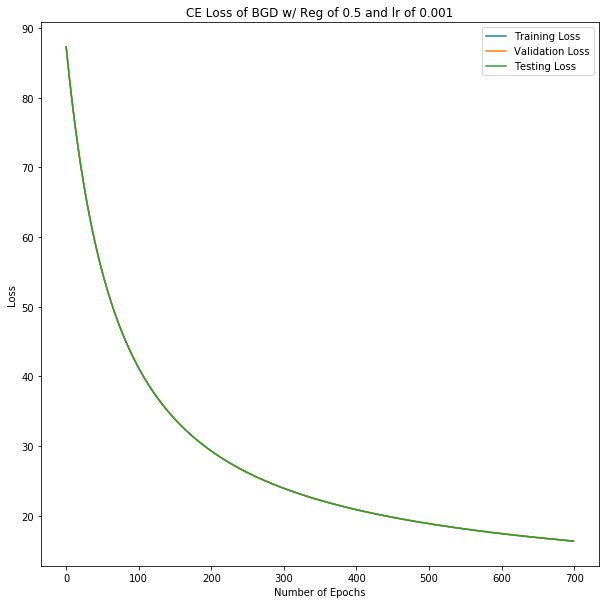

In [0]:
plotting_loss(epochs, training_error[0], validation_error[0], testing_error[0],"CE Loss of BGD w/ Reg of 0.5 and lr of 0.001")

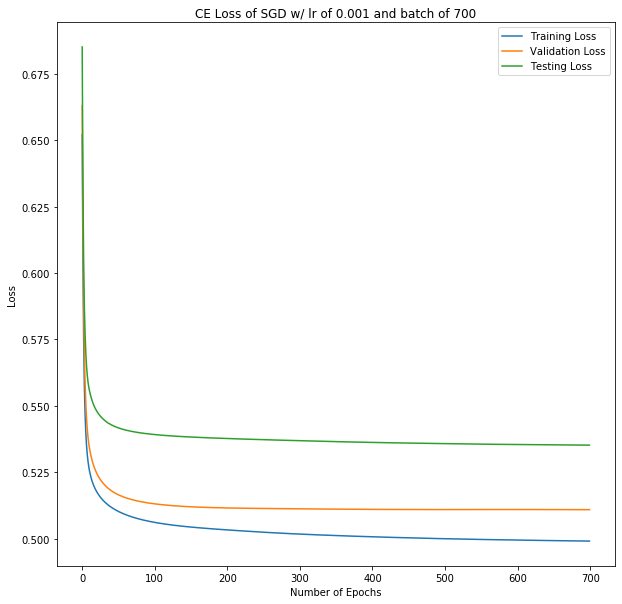

In [0]:
plotting_loss(epochs, ce_training_loss, ce_validation_loss, ce_testing_loss,"CE Loss of SGD w/ lr of 0.001 and batch of 700")

In [0]:
def plotting_accuracy_compare(epoch, training_accuracy, validation_accuracy, testing_accuracy, title):
    epoch_idx = np.arange(0, epoch)
    plt.figure(figsize=(10,10))
    plt.plot(epoch_idx,training_accuracy)
    plt.plot(epoch_idx,validation_accuracy)
    plt.plot(epoch_idx,testing_accuracy)
    plt.plot(epoch_idx,ce_training_accuracy)
    plt.plot(epoch_idx,ce_validation_accuracy)
    plt.plot(epoch_idx,ce_testing_accuracy)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy BGD', 'Validation Accuracy BGD', 'Testing Accuracy BGD','Training Accuracy SGD', 'Validation Accuracy SGD', 'Testing Accuracy SGD'])
    plt.title(title)
    plt.show()

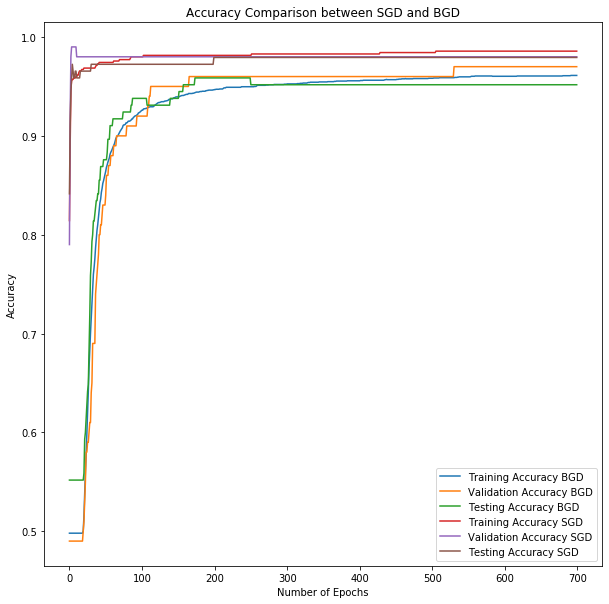

In [0]:
plotting_accuracy(epochs, training_accuracy[0], validation_accuracy[0], testing_accuracy[0], "Accuracy Comparison between SGD and BGD")